# Working with Multidimensional Coordinates

Author: [Ryan Abernathey](http://github.org/rabernat)

Many datasets have _physical coordinates_ which differ from their _logical coordinates_. Xarray provides several ways to plot and analyze such datasets.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import pyplot as plt

print("numpy version  : ", np.__version__)
print("pandas version : ", pd.__version__)
print("xarray version   : ", xr.version.version)

('numpy version  : ', '1.11.0')
('pandas version : ', u'0.18.0')
('xarray version   : ', '0.7.2-32-gf957eb8')


As an example, consider this dataset from the [xarray-data](https://github.com/pydata/xarray-data) repository.

In [2]:
ds = xr.tutorial.load_dataset('rasm')
ds

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) datetime64[ns] 1980-09-16T12:00:00 1980-10-17 ...
    yc       (y, x) float64 16.53 16.78 17.02 17.27 17.51 17.76 18.0 18.25 ...
    xc       (y, x) float64 189.2 189.4 189.6 189.7 189.9 190.1 190.2 190.4 ...
  * x        (x) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * y        (y) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
Data variables:
    Tair     (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    title: /workspace/jhamman/processed/R1002RBRxaaa01a/lnd/temp/R1002RBRxaaa01a.vic.ha.1979-09-01.nc
    institution: U.W.
    source: RACM R1002RBRxaaa01a
    output_frequency: daily
    output_mode: averaged
    convention: CF-1.4
    references: Based on the initial model of Liang et al., 1994, JGR, 99, 14,415- 14,429.
    comment: Output from the Variable Infiltration Capacity (VIC) model.
    nco_openmp_thread_number: 1
    N

In this example, the _logical coordinates_ are `x` and `y`, while the _physical coordinates_ are `xc` and `yc`, which represent the latitudes and longitude of the data.

In [3]:
print(ds.xc.attrs)
print(ds.yc.attrs)

OrderedDict([(u'long_name', u'longitude of grid cell center'), (u'units', u'degrees_east'), (u'bounds', u'xv')])
OrderedDict([(u'long_name', u'latitude of grid cell center'), (u'units', u'degrees_north'), (u'bounds', u'yv')])


## Plotting ##

Let's examine these coordinate variables by plotting them.

/Users/rpa/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


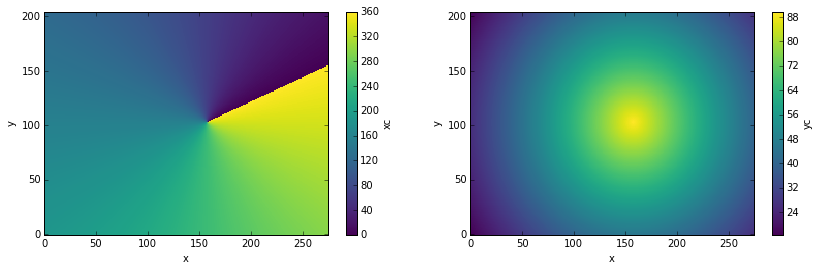

In [4]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
ds.xc.plot(ax=ax1)
ds.yc.plot(ax=ax2)

Note that the variables `xc` (longitude) and `yc` (latitude) are two-dimensional scalar fields.

If we try to plot the data variable `Tair`, by default we get the logical coordinates.

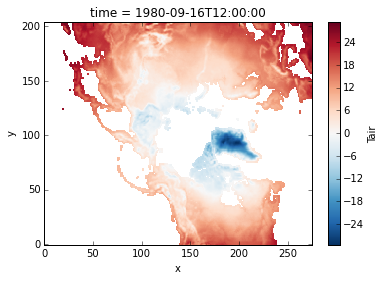

In [7]:
ds.Tair[0].plot()

In order to visualize the data on a conventional latitude-longitude grid, we can take advantage of xarray's ability to apply [cartopy](http://scitools.org.uk/cartopy/index.html) map projections.

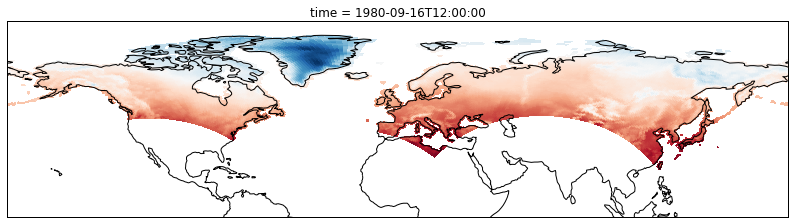

In [7]:
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.Tair[0].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='xc', y='yc', add_colorbar=False)
ax.coastlines()
ax.set_ylim([0,90]);

## Multidimensional Groupby ##

The above example allowed us to visualize the data on a regular latitude-longitude grid. But what if we want to do a calculation that involves grouping over one of these physical coordinates (rather than the logical coordinates), for example, calculating the mean temperature at each latitude. This can be achieved using xarray's `groupby` function, which accepts multidimensional variables. By default, `groupby` will use every unique value in the variable, which is probably not what we want. Instead, we can use the `groupby_bins` function to specify the output coordinates of the group. 

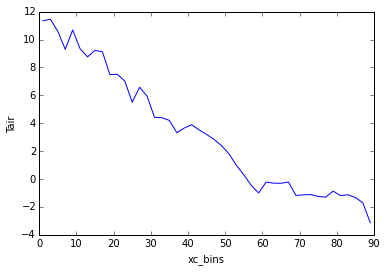

In [8]:
# define two-degree wide latitude bins
lat_bins = np.arange(0,91,2)
# define a label for each bin corresponding to the central latitude
lat_center = np.arange(1,90,2)
# group according to those bins and take the mean
Tair_lat_mean = ds.Tair.groupby_bins('xc', lat_bins, labels=lat_center).mean()
# plot the result
Tair_lat_mean.plot()

Note that the resulting coordinate for the `groupby_bins` operation got the `_bins` suffix appended: `xc_bins`. This help us distinguish it from the original multidimensional variable `xc`.